## Introduction to Logistic Regression (Key Features:)

1. Logistic Regression is primarily used as a classification algorithm.
2. It is a supervised learning algorithm, i.e. Data is labelled.
3. It is a parametric approach.
4. Decision boundary derived based on probability interpretation.
5. Decision boundary can be linear/non-linear.
6. Probabilities are modelled as a sigmoidal function.

The problem statement used for this project is based on ‘Automotive Crash Testing’.
A crash test is a form of destructive testing that is performed in order to ensure high safety standards for various cars is known as Automotive Crash Testing.

## Automotive Crash Testing - Problem Statement:

Several cars have rolled into an independent audit unit for crash test. They are being evaluated on a defined scale {poor(-10) to excellent(10)}on:

1. Manikin Head Impact
2. Manikin Body Impact
3. Interior Impact
4. Heat Ventilation Air Impact
5. Safety Alarm System

Since this is an example problem, we assume that the crash test was performed only on 100 cars. At the end of each test, the type of car - either Hatchback/SUV was noted. On the basis of this data analyzed, prediction of the type of the car in the future would be possible. We have used a part of data from the dataset for building the model whereas the remaining part of data would be used by us for analysis. We would use the data of the first 80 cars for model building whereas the data of remaining of 20 cars would be used for analysis.

Logistic Regression technique would primarily be used for classification of the types of car into Hatchback/SUV.

## Implementation of Logistic Regression using Python

### Import Python Libraries

In [25]:
import numpy as np
import pandas as pd
import nltk
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

### Read the data

In [26]:
df = pd.read_csv(r"C:\Users\jaini\OneDrive\Documents\crashTest_1.csv")
df

,CarID,ManHI,ManBI,IntI,HVACi,Safety,CarType
0,1,-5.27,-1.30,2.86,-4.85,4.04,1
1,2,-4.82,-5.38,9.72,-0.97,-4.57,2
2,3,9.57,-7.50,-7.61,1.33,-5.10,2
3,4,2.84,-2.85,0.92,5.51,-6.64,2
4,5,0.00,2.68,-4.15,0.85,5.58,1
...,...,...,...,...,...,...,...
95,96,8.29,1.44,-7.26,5.06,-7.00,1
96,97,9.09,-2.26,1.64,2.80,-1.22,2
97,98,5.04,4.52,0.28,8.26,4.59,2
98,99,4.55,-3.88,-2.02,-1.20,-0.42,2


### Explore, Understand and Clean the Data

In [27]:
df.head()

,CarID,ManHI,ManBI,IntI,HVACi,Safety,CarType
0,1,-5.27,-1.30,2.86,-4.85,4.04,1
1,2,-4.82,-5.38,9.72,-0.97,-4.57,2
2,3,9.57,-7.50,-7.61,1.33,-5.10,2
3,4,2.84,-2.85,0.92,5.51,-6.64,2
4,5,0.00,2.68,-4.15,0.85,5.58,1


In [28]:
rows, columns = df.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 100
Columns: 7


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CarID    100 non-null    int64  
 1   ManHI    100 non-null    float64
 2   ManBI    100 non-null    float64
 3   IntI     100 non-null    float64
 4   HVACi    100 non-null    float64
 5   Safety   100 non-null    float64
 6   CarType  100 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 5.6 KB


In [30]:
df.columns

Index(['CarID', 'ManHI', 'ManBI', 'IntI', 'HVACi', 'Safety', 'CarType'], dtype='object')

### Checking Missing Values in Data

In [31]:
df.isnull().sum()

CarID      0
ManHI      0
ManBI      0
IntI       0
HVACi      0
Safety     0
CarType    0
dtype: int64

### Dropping missing values from the Data

In [32]:
df = df.dropna()
df

,CarID,ManHI,ManBI,IntI,HVACi,Safety,CarType
0,1,-5.27,-1.30,2.86,-4.85,4.04,1
1,2,-4.82,-5.38,9.72,-0.97,-4.57,2
2,3,9.57,-7.50,-7.61,1.33,-5.10,2
3,4,2.84,-2.85,0.92,5.51,-6.64,2
4,5,0.00,2.68,-4.15,0.85,5.58,1
...,...,...,...,...,...,...,...
95,96,8.29,1.44,-7.26,5.06,-7.00,1
96,97,9.09,-2.26,1.64,2.80,-1.22,2
97,98,5.04,4.52,0.28,8.26,4.59,2
98,99,4.55,-3.88,-2.02,-1.20,-0.42,2


### Analyzing the Data

In [33]:
df.describe()

,CarID,ManHI,ManBI,IntI,HVACi,Safety,CarType
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,-0.065400,-0.676600,-0.003100,0.240500,0.473200,1.600000
std,29.011492,5.863313,5.332167,5.621494,5.726067,5.840216,0.492366
min,1.000000,-9.940000,-9.940000,-9.990000,-9.820000,-9.800000,1.000000
25%,25.750000,-5.312500,-4.557500,-4.760000,-5.177500,-5.017500,1.000000
50%,50.500000,0.665000,-1.510000,0.275000,0.870000,0.730000,2.000000
75%,75.250000,5.065000,3.362500,4.837500,5.185000,4.652500,2.000000
max,100.000000,9.570000,9.610000,9.720000,9.890000,9.990000,2.000000


### Splitting Dataset into Feature and Target Variables

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [35]:
feature_cols = ['CarID','ManHI','ManBI','IntI','HVACi','Safety']
X = df[feature_cols]
y = df.CarType

### Splitting X and y into training and testing sets

Dividing the dataset into a training set and a test set is a good strategy to understand model performance.

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

### Model Development and Prediction

1. Import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.
2. Fit your model on the train set using fit() and perform prediction on the test set using predict().

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [39]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 8,  0],
       [ 2, 15]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2X2 because this model is binary classification. You have two classes 0 and 1.

1. Diagonal values represent accurate predictions.
2. Non-diagonal elements are inaccurate predictions.

In the output, 8 and 15 are actual predictions, and 2 and 0 are incorrect predictions.

### Confusion Matrix Evaluation Metrics

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.92
Precision: 0.8
Recall: 1.0


We got a classification rate of 92%, which is considered as a very good accuracy. 

### Visualizing Confusion Matrix using HeatMap

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

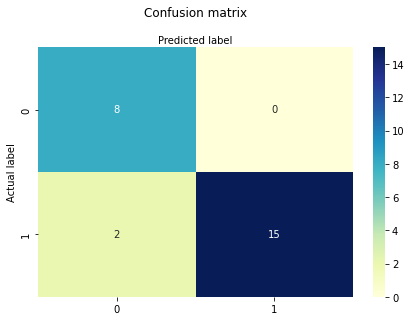

In [42]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')